In [1]:
from DP.projected_gradient_ascent import PGA
from DP.linear_solver import LinearSolver
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized, reduce_optimal_matrix
import numpy as np

In [2]:
N = 3
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(PGA(), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.13776563916667725	0.13776563848852716	0.3744858319761186	0.3744858318181308
row 1: 0.10660086913602235	0.10660086885653546	0.2897712049598285	0.2897712048003204
row 2: 0.024574913022645566	0.024574913793405016	0.06680154164559723	0.06680154169256684
row 3: 0.7310585786747721	0.7310585788617289	0.26894142141843	0.26894142168874646
Converged after 29 iterations.
1.9219704029281566
row 0: 0.26894142136999516	0.26894142136999516	0.7310585786300049	0.7310585786300049
row 1: 0.7310585786300048	0.7310585786300048	0.2689414213699951	0.2689414213699951
1.921970403306652


4it [00:07,  1.76s/it]


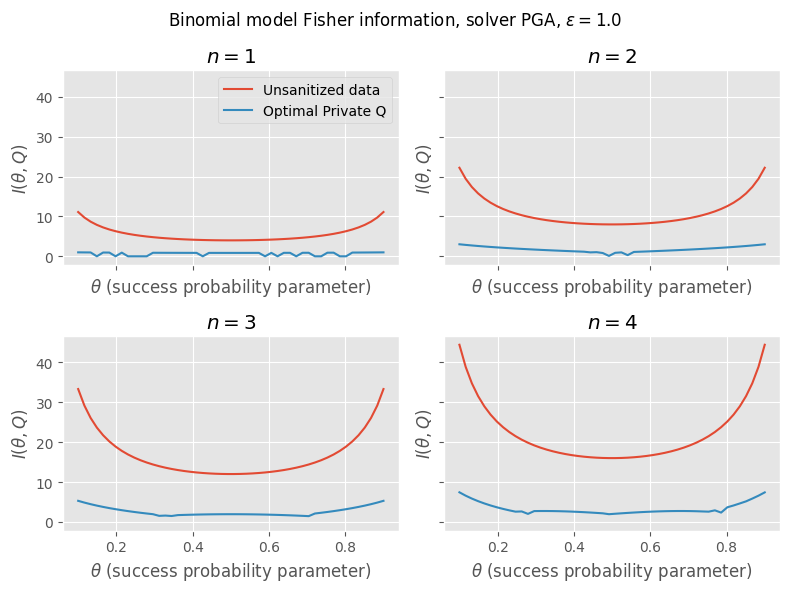

In [3]:
DP_tester.plot_fisher_infos(PGA(), ns=[1, 2, 3, 4], epsilon=1.0)

100%|██████████| 50/50 [00:00<00:00, 85.13it/s]


[]


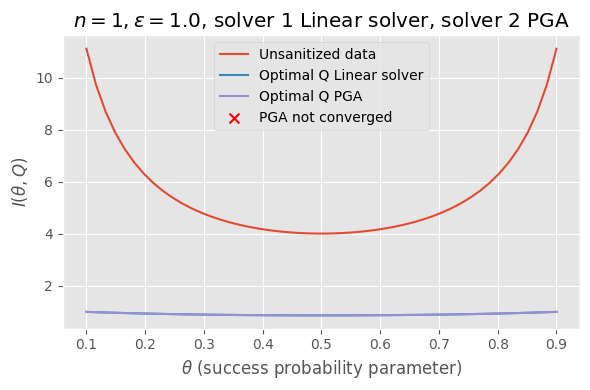

In [4]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 1, 1.0)

100%|██████████| 50/50 [00:05<00:00,  9.97it/s]


[0.50816327]


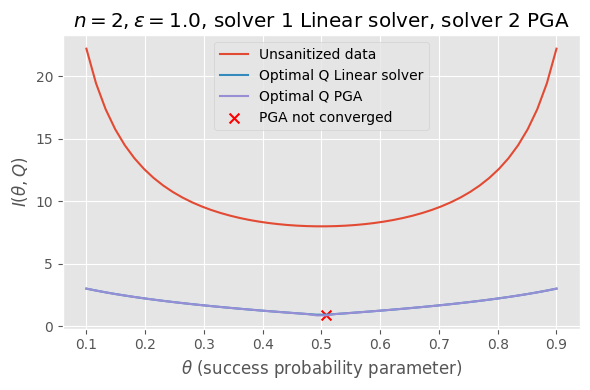

In [5]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 2, 1.0)

100%|██████████| 50/50 [00:10<00:00,  4.72it/s]

[0.37755102 0.39387755 0.42653061 0.50816327 0.54081633 0.67142857
 0.73673469 0.75306122]


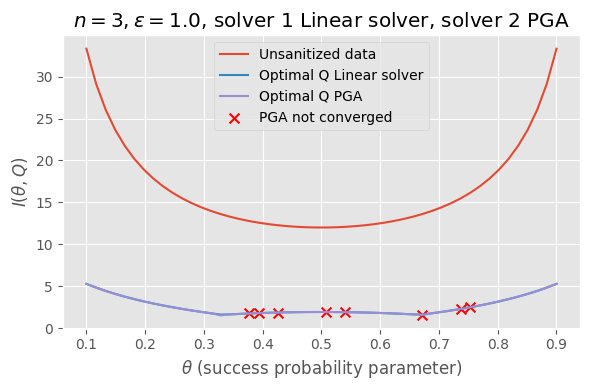

In [6]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 3, 1.0)

  0%|          | 0/50 [00:00<?, ?it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [00:47<00:00,  1.05it/s]

[0.11632653 0.3122449  0.32857143 0.49183673 0.88367347]


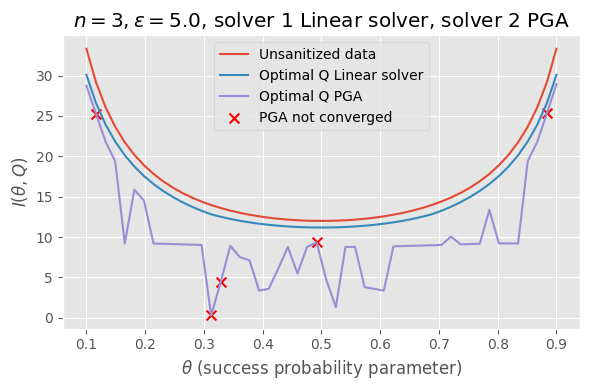

In [4]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 3, 5.0)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:33<00:00,  1.49it/s]

[0.1        0.11632653 0.13265306 0.14897959 0.18163265 0.19795918
 0.23061224 0.26326531 0.27959184 0.29591837 0.3122449  0.36122449
 0.37755102 0.39387755 0.41020408 0.5244898  0.55714286 0.57346939
 0.58979592 0.63877551 0.65510204 0.6877551  0.73673469 0.75306122
 0.78571429 0.80204082 0.81836735 0.83469388 0.85102041 0.86734694
 0.88367347 0.9       ]


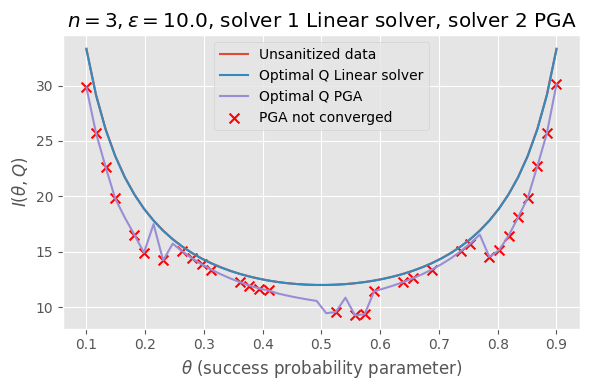

In [8]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 3, 10.0)

In [9]:
results = DP_tester.max_discrepancy_between_two_solvers(
    LinearSolver(), 
    PGA(), 
    np.arange(10) + 1, 
    [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], 
    sampled_thetas=20
)

4it [03:23, 50.97s/it]


KeyboardInterrupt: 

In [10]:
DP_tester.compare_runtimes([LinearSolver(), PGA()], [i for i in range(2, 14)], 0.5, 1.0, log=True)

Calculating for Linear solver


100%|██████████| 12/12 [00:07<00:00,  1.67it/s]


Calculating for PGA


 33%|███▎      | 4/12 [00:23<00:46,  5.78s/it]


KeyboardInterrupt: 

100%|██████████| 50/50 [03:59<00:00,  4.78s/it]

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59 0.61 0.63 0.65 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83
 0.87 0.89 0.91 0.93 0.95 0.97 0.99]


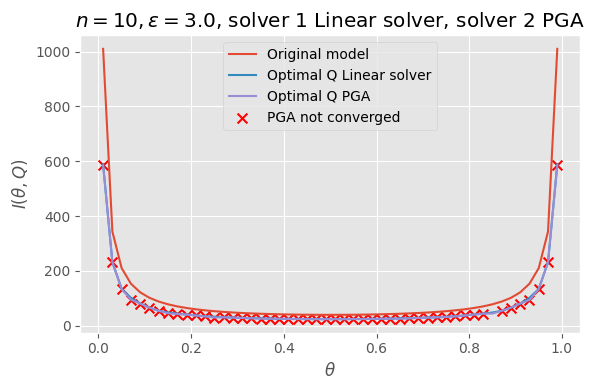

In [11]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGA(), 10, 3.0)

100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


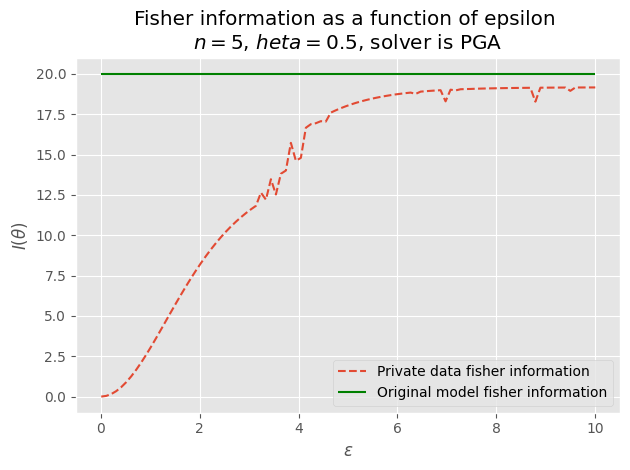

In [12]:
DP_tester.fisher_inf_vs_epsilon(PGA(), 5, 0.5)